In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
data = pd.read_csv("./data/salary2.csv")
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
data2 = data.copy()

## 컬럼별 해석 - Adult Income Dataset

| 컬럼명            | 의미                                                | 예시 값 해석                            |
|------------------|-----------------------------------------------------|----------------------------------------|
| `age`            | 나이                                                | 25 → 25세                              |
| `workclass`      | 고용 형태 (직장 유형)                                | Private → 민간 기업, Local-gov → 지방 정부 |
| `education`      | 교육 수준 (문자열)                                   | HS-grad → 고졸, 11th → 고1 수준         |
| `education-num`  | 교육 수준 (숫자형, `education`과 매핑됨)             | 9 → 고졸                                |
| `marital-status` | 결혼 상태                                            | Never-married → 미혼, Married-civ-spouse → 결혼함 |
| `occupation`     | 직업군                                               | Farming-fishing → 농어업, Tech-support → 기술 지원 |
| `relationship`   | 가정 내 관계                                         | Husband → 남편, Own-child → 자녀        |
| `race`           | 인종                                                | White → 백인, Black → 흑인             |
| `sex`            | 성별                                                | Male → 남성, Female → 여성             |
| `capital-gain`   | 투자 수익 (주식, 부동산 등)                         | 0.0 → 수익 없음                         |
| `capital-loss`   | 투자 손실 (세금 손실로 처리되는 금액)               | 0 → 손실 없음                           |
| `hours-per-week` | 주당 근무 시간                                       | 40 → 주 40시간 근무                    |
| `native-country` | 출신 국가                                            | United-States → 미국 출신              |
| `class`          | 소득 구간 (타깃 변수)                                | <=50K → 연 $50,000 이하, >50K → 초과   |


* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

## 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지


In [3]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [7]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# 결측값 탐색

In [9]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [11]:
data['class'].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [12]:
data[data['workclass'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
#occupation 결측값 컬럼들
data[data['occupation'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [18]:
#workclass가 결측이면 occupation도 결측

data[(data['workclass'].isna()) & (data['occupation'].isna()) & (data['class'] == " >50K")]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,>50K
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,>50K
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,>50K
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,>50K
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,>50K
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K


In [20]:
# <50K 컬럼명에 공백이 포함되어 있으므로 주의
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
265 / 11687 * 100

2.267476683494481

In [22]:
data.dropna()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
45222 / len(data) * 100

92.58834609557348

# 결측값의 비율이 약 7.5%이고 삭제시 데이터 분포에 편향을 주지 않으므로 삭제

In [25]:
data = data.dropna()
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
data = data.reset_index(drop=True)

In [27]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
data['class'] = data['class'].apply(lambda x: 1 if x == " >50K" else 0)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [31]:
data['capital-gain'].value_counts()

capital-gain
0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
7262         1
1731         1
22040        1
1639         1
2387         1
Name: count, Length: 121, dtype: int64

<Axes: ylabel='Frequency'>

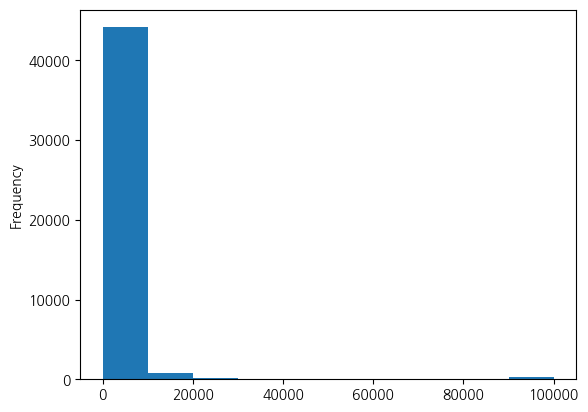

In [32]:
data['capital-gain'].plot(kind='hist')

이상값이 없음

# EDA 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


In [34]:
#object인 것과 아닌 것

obj_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

In [36]:
obj_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States
...,...,...,...,...,...,...,...,...
45217,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
45218,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
45219,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
45220,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [46]:
for col in obj_cols:
    print("=" * 30, col, "=" * 30)
    print(col, f"nunique {obj_cols[col].nunique()}")    
    print(obj_cols[col].value_counts())
    print()

============================== workclass ==============================
workclass nunique 7
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

============================== education ==============================
education nunique 16
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

============================== marital-status ==============================
marital-status nunique 7
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  62

In [48]:
final_cols = []
for col in important_cols:
    if len(col) > 0:
        print(col.name, len(col))
        final_cols.append(col.name)
    print(len(col))

NameError: name 'important_cols' is not defined

# 수치형 변수들 EDA

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=30)

NameError: name 'X' is not defined

In [52]:
X_train

NameError: name 'X_train' is not defined

In [53]:
y_train

NameError: name 'y_train' is not defined

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [55]:
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined

# 모델 성능 튜닝 (하이퍼파라미터 튜닝)

In [56]:
for i in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=i, random_state= 10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

NameError: name 'X_train' is not defined

# 의사결정나무 시각화

In [57]:
from sklearn.tree import plot_tree

In [58]:
plt.figure(figsize=(20, 20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, fontsize=15, filled=True)
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

<Figure size 2000x2000 with 0 Axes>

In [8]:
data['workclass'].describe()

count        46043
unique           8
top        Private
freq         33906
Name: workclass, dtype: object

In [9]:
data['occupation'].describe()

count               46033
unique                 14
top        Prof-specialty
freq                 6172
Name: occupation, dtype: object

In [10]:
data['native-country'].describe()

count              47985
unique                41
top        United-States
freq               43832
Name: native-country, dtype: object

In [11]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [12]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])

In [13]:
data['workclass'].isna().sum()

np.int64(0)

In [14]:
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

In [15]:
data['occupation'].isna().sum()

np.int64(0)

In [16]:
data['native-country'].describe()

count              47985
unique                41
top        United-States
freq               43832
Name: native-country, dtype: object

In [17]:
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [18]:
data['native-country'].isna().sum()

np.int64(0)

In [19]:
data.isna().sum(0)

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

<Axes: >

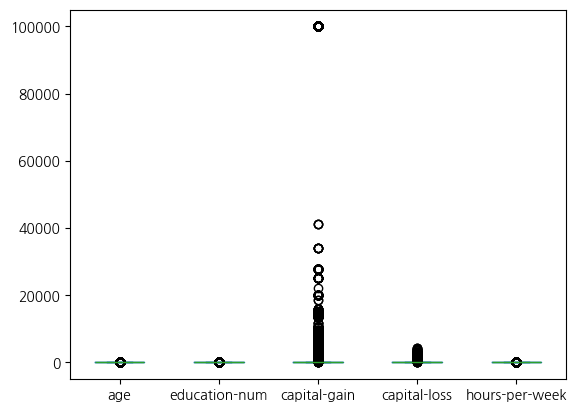

In [20]:
data.plot(kind='box')

In [21]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [22]:
data['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [23]:
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
# 이상값만 capital-gain에서 제거하고 나머지 데이터는 그대로 둠
data['capital-gain'] = np.where(
    (data['capital-gain'] > upper_bound) | (data['capital-gain'] < lower_bound),
    np.nan,  # 또는 upper_bound 등으로 대체 가능
    data['capital-gain']
)

<Axes: >

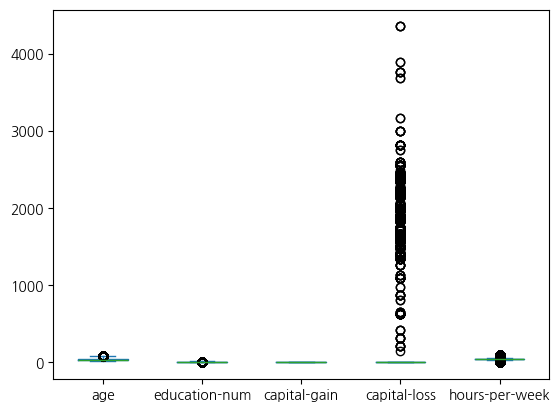

In [26]:
data.plot(kind='box')

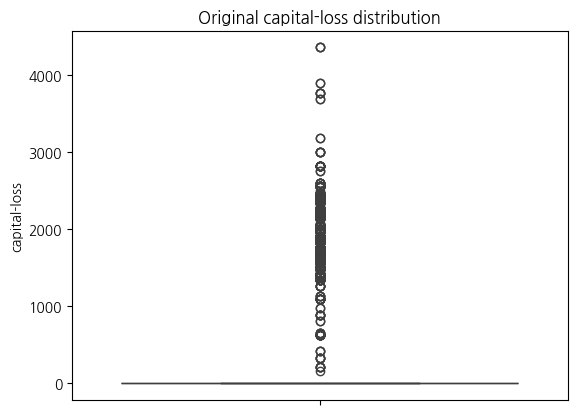

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['capital-loss'])
plt.title('Original capital-loss distribution')
plt.show()


In [28]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,44807.0,48842.000000,48842.000000
mean,38.643585,10.078089,0.0,87.502314,40.422382
std,13.710510,2.570973,0.0,403.004552,12.391444
min,17.000000,1.000000,0.0,0.000000,1.000000
25%,28.000000,9.000000,0.0,0.000000,40.000000
50%,37.000000,10.000000,0.0,0.000000,40.000000
75%,48.000000,12.000000,0.0,0.000000,45.000000
max,90.000000,16.000000,0.0,4356.000000,99.000000


<Axes: ylabel='count'>

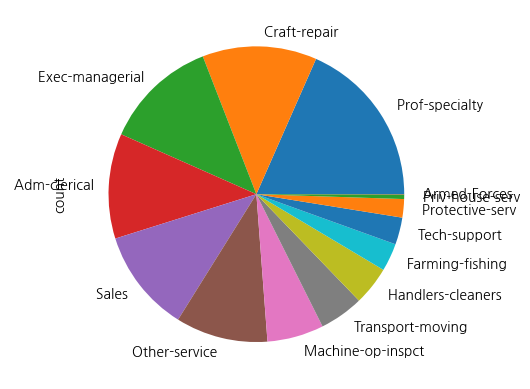

In [31]:
data['occupation'].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

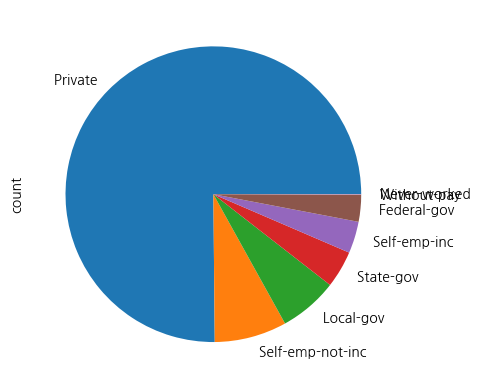

In [33]:
data['workclass'].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

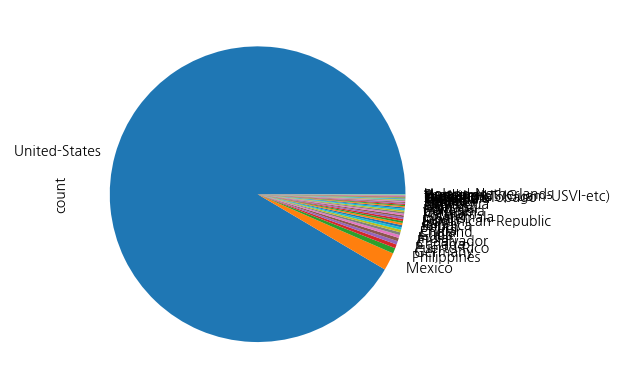

In [34]:
data['native-country'].value_counts().plot(kind="pie")

In [35]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,NaN,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20,United-States,<=50K


In [36]:
data['capital-gain'] = data['capital-gain'].fillna(data['capital-gain'].mode()[0])

In [37]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20,United-States,<=50K


In [38]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [ ]:
data.plot(kind='box')

<function matplotlib.pyplot.show(close=None, block=None)>

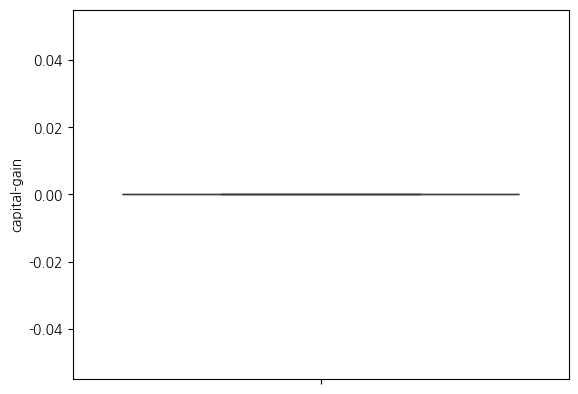

In [40]:
sns.boxplot(data=data['capital-gain'])
plt.show

In [52]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20,United-States,<=50K


In [51]:
data['race'][19]

' Asian-Pac-Islander'

In [63]:
data = pd.get_dummies(data, columns=['sex', 'class'], drop_first=True)

In [64]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_ Male,class_ >50K
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0.0,0,40,United-States,True,False
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0.0,0,50,United-States,True,False
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0.0,0,40,United-States,True,True
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0.0,0,40,United-States,True,True
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,0.0,0,30,United-States,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0.0,0,38,United-States,False,False
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0.0,0,40,United-States,True,True
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0.0,0,40,United-States,False,False
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0.0,0,20,United-States,True,False


# 데이터 분석 모델의 성능평가

1. accuravy(정확도/정분류율): 1을 1이라고 맞추고 0을 0이라고 맞춘 비율
2. False Positive Rate (오분류율): 1을  0이라고 예측하고 0을 1이라고 예측해서 잘못 예측한 비율
3. precision(정밀도): 예측한 것 중에서 실제로 맞은 비율 => 예측 positive 중에서 실제 positive인 비율
4. recall (재현율/민감도): 실제값을 실제값으로 잘 예측한 것 => 실제 positive 중에서 예측 positive가 맞은 것
5. F1-Score: precision과 recall의 조화 평균
6. Specificity(특이도): 실제 negative중 예측에 성공한 비율

# confusion matrix (혼동행렬)
|              | 예측 Positive     | 예측 Negative    |
|--------------|-------------------|------------------|
|실제 Positive | TP(True Positive) |FN(False Negative)|
|실제 Negative | FP(False Positive)|TN(True Negative) |
* TP: 실제 Positive, 예측 Positive(실제 연봉 5만, 예측 연봉 5만)
* TN: 실제 Negative, 예측 Negative(실제 연봉 5만 X, 예측 연봉 5만 X)
* FP(1형 오류): 실제 Negative, 예측 Positive(실제 연봉 5만 X, 예측 연봉 5만 초과)
* FN(2형 오류): 실제 Positive, 예측 Negative(실제 연봉 5만 초과, 예측 연봉 5만 이하)

* 정확도 (acuuracy_score): (TP + TN) / (TP + TN + FP + FN)
* 오분류율(False Positive Rate): (FP+FN) / (TP + TN + FP + FN)
* 정밀도(precision): TP / (TP + FP)
* 재현율/민감도(recall): TP / (TP+FN)
* 특이도(Specificity): TN / (FP + TN)
* F1-Score: $ F1-Score = 2 \cdot {Precision \cdot Recall \over Precision + Recall} $

* 정확도(accuracy_score): $ TP + TN \over TP+TN+FP+FN $
* 오분류율(FPR): $ FP+FN \over TP+TN+FP+FN $
* 정밀도(precision): $ TP \over TP+FP $
* 재현율/민감도(recall): $ TP \over TP+FN $
* 특이도(Specificity): $ TN \over FP+TN $
* F1-score: $  2 \cdot {Precision \cdot Recall \over Precision + Recall} $   

In [ ]:
from sklearn.metrics import confusion

# Dataset2: 모든 컬럼을 다 넣고 분석해보기

In [4]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
X2 = data.drop('class', axis=1)
X2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [9]:
X2 = pd.get_dummies(X2, )

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.4, random_state=10)

NameError: name 'train_test_split' is not defined

In [11]:
dtc2 = DecisionTreeClassifier(random_state=10)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

NameError: name 'DecisionTreeClassifier' is not defined

In [12]:
for i in range(1, 11):
    dtc2 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc2.fit(X2_train, y2_train)
    pred2 = dtc2.predict(X2_test)
    print("=" * 30, "max_depth", i, "=" * 30)
    print(accuracy_score(y2_test, pred2))
    print(classification_report(y2_test, pred2))
    print()

NameError: name 'DecisionTreeClassifier' is not defined

# EDA를 간편하게 하자
* ydata

In [14]:
from ydata_profiling import ProfileReport

C:\Users\vbak0\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
profile = ProfileReport(data2, title="Profiling Report")

In [19]:
profile.to_file("salary2_eda.html")

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.62it/s]


y-data의 결과를 통해 데이터 전처리

In [21]:
data2 = data2.dropna()
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
data2[data2.duplicated()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
595,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
653,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
741,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
864,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1131,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48793,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
48808,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [25]:
data2.drop_duplicates()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [26]:
data2 = data2.drop_duplicates()

In [27]:
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [28]:
data2 = data2.drop(["education", "relationship"], axis=1)
data2

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,>50K
48836,22,Private,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,<=50K
48837,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
48839,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [29]:
data2 = data2.reset_index(drop=True)
data2

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,>50K
39236,22,Private,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,<=50K
39237,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
39238,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [35]:
data2 = pd.get_dummies(data2, drop_first=True)
X3 = data2.drop("class_ >50K", axis=1)
y3 = data2['class_ >50K']

In [39]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.4, stratify = 3, random_state=10)

NameError: name 'train_test_split' is not defined

In [42]:
for i in range(1, 31):
    dtc3 = DecisionTreeClassifier(max_depth=8, random_state=10)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print(f"max_depth:{i}", "=" * 30)
    print(accuracy_score(y_test, pred3))
    print(classification_report(y3_test, pred3))

NameError: name 'DecisionTreeClassifier' is not defined

In [44]:
print(classification_report(y_test, pred3))
print(classification_report(y2_test, pred3))
print(classification_report(y3_test, pred3))

NameError: name 'classification_report' is not defined

# 배깅, 부스팅, 랜덤배깅

# 배깅
* 투표를 통해 결정
* 복잡한 붓스트랩, 복잡한 

In [45]:
from sklearn.ensemble import BaggingClassifier

In [47]:
bc = BaggingClassifier(n_estimators=2, n_jobs=10, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined

In [48]:
est = DecisionTreeClassifier(max_depth=9, ramdom_state=10)
bc = BaggingClassifier(estimators=est, n_jobs=10, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'DecisionTreeClassifier' is not defined

# 부스팅
* 처음 만든 붓스트랩을 분석한 후 정답은 제외하고 틀린 것만 모아서 다시 붓스트랩을 만들고 공부 후 틀린 것을 다시 공부하는 것
* 점진적으로 성능이 향상되는 알고리즘
* XGBoost, LightGBM, Catboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
abc = AdaBoostClassifier(n_estimators=100, random_state=10)
abc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, random_state=10)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined

# XGBoost
* 병렬 연산 가능 => 처리 속도 매우 빠름
* 따로 설치 필요

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.5, random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined

# LightGBM
* xgboost보다 속도를 더 빠르게
* 비대칭 트리를 만듦

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(max_depth=8, n_estimators=500, learning_rate=0.5, random_state=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# Catboost 

In [65]:
from catboost import CatboostClassifier

ImportError: cannot import name 'CatboostClassifier' from 'catboost' (C:\Users\vbak0\miniforge3\envs\fintech\lib\site-packages\catboost\__init__.py)

In [ ]:
%%time
cbc = CatBoostClassifier(n_estimators=500, random_state=10)
cbc.fit(X_train, y_train)
pred = cbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# 랜덤 배깅 (RandomForest)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
for i in range(1, 21):
    
    rfc = RandomForestClassifier(n_estimators=500, n_jobs=10, random_state=10)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    print(i)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined